### Mini batch Task
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('../datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
# cut (label_encoder)
d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [3]:
# color (one hot encoder)
d_df.color.value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
# price -> Traget

In [5]:
from sklearn.preprocessing import LabelEncoder

pre_d_df = d_df.copy()
columns = ['cut','clarity']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders


{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

In [6]:
pre_d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43


In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_d_df[['color']])
one_hot_encoder.categories_

pre_d_df = pd.concat([pre_d_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)],axis =1)
pre_d_df



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,1,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,2,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,3,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,4,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,5,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,53940,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,53941,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,53942,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [8]:
# 불필요 feature 삭제
pre_d_df= pre_d_df.drop(labels=['color', 'Unnamed: 0'], axis =1)
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [9]:
pre_d_df.columns

Index([  'carat',     'cut', 'clarity',   'depth',   'table',   'price',
             'x',       'y',       'z',    ('D',),    ('E',),    ('F',),
          ('G',),    ('H',),    ('I',),    ('J',)],
      dtype='object')

In [11]:
pre_d_df.columns = ['carat','cut', 'clarity', 'depth','table','price','x','y','z','Color_D','Color_E','Color_F','Color_G','Color_H','Color_I','Color_J']
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [12]:
# price 맨 뒤로 보내기

target_columns = pre_d_df.pop('price') 
pre_d_df['price'] = target_columns  # 추출한 'B' 열을 다시 추가하여 맨 뒤로 이동

pre_d_df


,carat,cut,clarity,depth,table,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J,price
0,0.23,2,3,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0,326
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0,326
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0,327
3,0.29,3,5,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0,334
4,0.31,1,3,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,6.15,6.12,3.74,0,0,0,0,1,0,0,2757
53939,0.75,2,3,62.2,55.0,5.83,5.87,3.64,1,0,0,0,0,0,0,2757
53940,0.71,3,2,60.5,55.0,5.79,5.74,3.49,0,1,0,0,0,0,0,2756
53941,0.71,3,2,59.8,62.0,5.74,5.73,3.43,0,0,1,0,0,0,0,2756


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'Color_D'}>,
        <Axes: title={'center': 'Color_E'}>,
        <Axes: title={'center': 'Color_F'}>,
        <Axes: title={'center': 'Color_G'}>],
       [<Axes: title={'center': 'Color_H'}>,
        <Axes: title={'center': 'Color_I'}>,
        <Axes: title={'center': 'Color_J'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

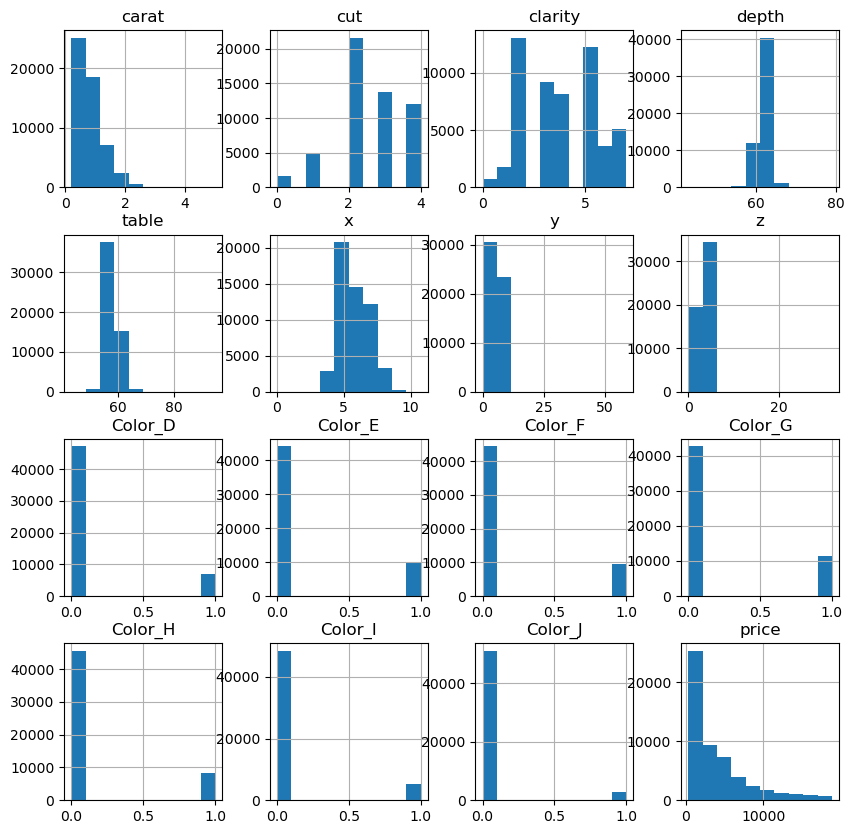

In [13]:
pre_d_df.hist(figsize=(10,10))

<Axes: >

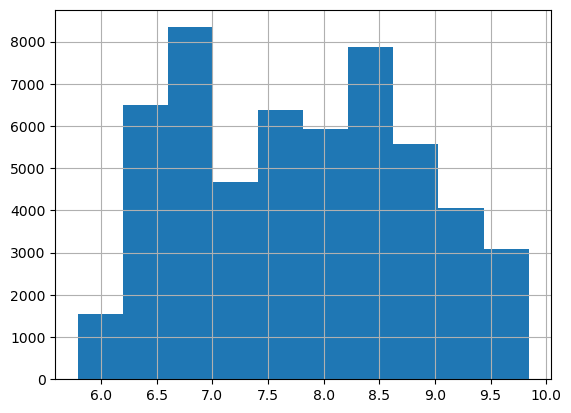

In [14]:
# target의 분포를 정규분포 형식으로 맞춰줘야 mini batch 를 사용 가능
np.log1p(pre_d_df['price']).hist()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'Color_D'}>,
        <Axes: title={'center': 'Color_E'}>,
        <Axes: title={'center': 'Color_F'}>,
        <Axes: title={'center': 'Color_G'}>],
       [<Axes: title={'center': 'Color_H'}>,
        <Axes: title={'center': 'Color_I'}>,
        <Axes: title={'center': 'Color_J'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

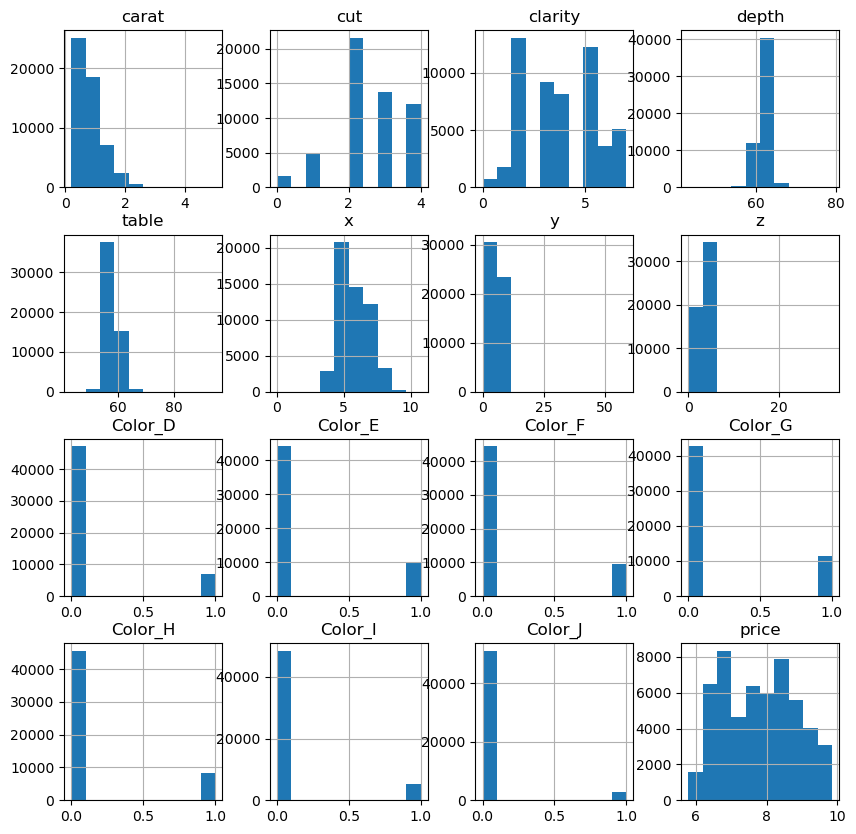

In [15]:
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df['price'])
pre_d_df.hist(figsize=(10, 10))

In [16]:
pre_d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   clarity  53943 non-null  int32  
 3   depth    53943 non-null  float64
 4   table    53943 non-null  float64
 5   x        53943 non-null  float64
 6   y        53943 non-null  float64
 7   z        53943 non-null  float64
 8   Color_D  53943 non-null  int8   
 9   Color_E  53943 non-null  int8   
 10  Color_F  53943 non-null  int8   
 11  Color_G  53943 non-null  int8   
 12  Color_H  53943 non-null  int8   
 13  Color_I  53943 non-null  int8   
 14  Color_J  53943 non-null  int8   
 15  price    53943 non-null  float64
dtypes: float64(7), int32(2), int8(7)
memory usage: 3.7 MB


In [17]:
# 상관관계 확인
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

x          0.958027
y          0.936190
z          0.935233
carat      0.920252
table      0.158203
Color_J    0.082972
Color_I    0.077838
Color_H    0.055371
cut        0.022905
Color_G    0.001424
depth      0.000852
Color_F   -0.011124
Color_D   -0.063466
Color_E   -0.096278
clarity   -0.120026
Name: price, dtype: float64

In [18]:
pre_d_df.shape

(53943, 16)

In [20]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.utils.data import TensorDataset, DataLoader 

torch.manual_seed(321)

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# features
# targets

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test =torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=1000, shuffle=True)

l_r = Linear(15, 1)

optimizer = SGD(l_r.parameters(), lr= 0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(y_train, H)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/44, W1: 0.2746, W2: -0.0641, W3: 0.0585, W4: 0.0281, W5: 0.0308, W6: 0.2973, W7: 0.2624, W8: 0.2662, W9: 0.1128, W10: -0.1599, W11: 0.1497, W12: 0.0184, W13: -0.0778, W14: -0.1406, W15: -0.0944, b: -0.1373
loss: 0.1045
Epoch: 100/1000, Batch: 2/44, W1: 0.2746, W2: -0.0641, W3: 0.0585, W4: 0.0281, W5: 0.0308, W6: 0.2973, W7: 0.2624, W8: 0.2662, W9: 0.1128, W10: -0.1599, W11: 0.1496, W12: 0.0184, W13: -0.0778, W14: -0.1406, W15: -0.0944, b: -0.1373
loss: 0.1088
Epoch: 100/1000, Batch: 3/44, W1: 0.2746, W2: -0.064, W3: 0.0585, W4: 0.0282, W5: 0.0309, W6: 0.2974, W7: 0.2625, W8: 0.2662, W9: 0.1128, W10: -0.1599, W11: 0.1496, W12: 0.0184, W13: -0.0778, W14: -0.1406, W15: -0.0944, b: -0.1373
loss: 0.0886
Epoch: 100/1000, Batch: 4/44, W1: 0.2746, W2: -0.064, W3: 0.0585, W4: 0.0282, W5: 0.0308, W6: 0.2974, W7: 0.2625, W8: 0.2662, W9: 0.1128, W10: -0.1599, W11: 0.1496, W12: 0.0184, W13: -0.0778, W14: -0.1406, W15: -0.0944, b: -0.1373
loss: 0.0925
Epoch: 100/1000, Batch

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [22]:
y_test = y_test.detach().numpy()
H = l_r(X_test)
H
prediction = H.detach().numpy()

In [23]:
get_evaluation(y_test, prediction)

MSE: 0.0917, RMSE: 0.3029, MSLE: 0.0009, RMSLE: 0.0304


In [25]:
# 돤련성 없는 feature 삭제 후 훈련
columns = ['x','y','z','carat','table', 'price']
s_pre_d_df = pre_d_df.loc[:, columns]
s_pre_d_df


,x,y,z,carat,table,price
0,3.95,3.98,2.43,0.23,55.0,5.789960
1,3.89,3.84,2.31,0.21,61.0,5.789960
2,4.05,4.07,2.31,0.23,65.0,5.793014
3,4.20,4.23,2.63,0.29,58.0,5.814131
4,4.34,4.35,2.75,0.31,58.0,5.817111
...,...,...,...,...,...,...
53938,6.15,6.12,3.74,0.86,58.0,7.922261
53939,5.83,5.87,3.64,0.75,55.0,7.922261
53940,5.79,5.74,3.49,0.71,55.0,7.921898
53941,5.74,5.73,3.43,0.71,62.0,7.921898


In [26]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.utils.data import TensorDataset, DataLoader 

torch.manual_seed(321)

features, targets = s_pre_d_df.iloc[:, :-1], s_pre_d_df.iloc[:, -1]

# features
# targets

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test =torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=1000, shuffle=True)

l_r = Linear(5, 1)

optimizer = SGD(l_r.parameters(), lr= 0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        
        loss = mse_loss(y_train, H)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/44, W1: 0.5385, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0483, b: -0.0289
loss: 0.0977
Epoch: 100/1000, Batch: 2/44, W1: 0.5385, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0483, b: -0.0289
loss: 0.0922
Epoch: 100/1000, Batch: 3/44, W1: 0.5385, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0482, b: -0.0289
loss: 0.0871
Epoch: 100/1000, Batch: 4/44, W1: 0.5386, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0484, b: -0.0289
loss: 0.1528
Epoch: 100/1000, Batch: 5/44, W1: 0.5386, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0486, b: -0.0289
loss: 0.1323
Epoch: 100/1000, Batch: 6/44, W1: 0.5386, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0484, b: -0.0289
loss: 0.0905
Epoch: 100/1000, Batch: 7/44, W1: 0.5386, W2: 0.0253, W3: 0.564, W4: -0.2333, W5: 0.0484, b: -0.0289
loss: 0.0956
Epoch: 100/1000, Batch: 8/44, W1: 0.5386, W2: 0.0254, W3: 0.564, W4: -0.2333, W5: 0.0483, b: -0.0289
loss: 0.0939
Epoch: 100/1000, Batch: 9/44, W1: 0.5386, W2: 0.0254, W3: 0.564, W4: -0.2333, W5: 0.0483

In [27]:
y_test = y_test.detach().numpy()
H = l_r(X_test)
H
prediction = H.detach().numpy()

In [28]:
get_evaluation(y_test, prediction)

MSE: 0.1166, RMSE: 0.3415, MSLE: 0.0013, RMSLE: 0.0362


### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value): 해당 독립 변수가 0.05보다 작으면 족속 변수에 영향을 미치는 것이 유의미하다라는 것을 뜻한다.
- Durbin-Watson: 보통 1.5에서 2.5사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sub>2</sub>값을 유지 또는 개선하는 방향으로만 수행해야 한다.

In [31]:
import statsmodels.api as sm

# features, targets = pre_d_df.iloc[:, 0:2], pre_d_df.price
features, targets = pre_d_df.iloc[:, :-1], pre_d_df.price

print(sm.OLS(targets, features).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 7.000e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:26:36   Log-Likelihood:                 2365.5
No. Observations:               53943   AIC:                            -4701.
Df Residuals:                   53928   BIC:                            -4568.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -0.5884      0.010    -59.504      0.0

### VIF (Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src ="../images/multicollinearity.png">

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [34]:
display(feature_engineering_VIF(features))

,score,feature
0,22.091362,carat
1,1.052222,cut
2,1.072070,clarity
3,1.539329,depth
4,1.161786,table
5,56.633025,x
6,20.465874,y
7,23.540681,z
8,626.797033,Color_D
9,906.371393,Color_E


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

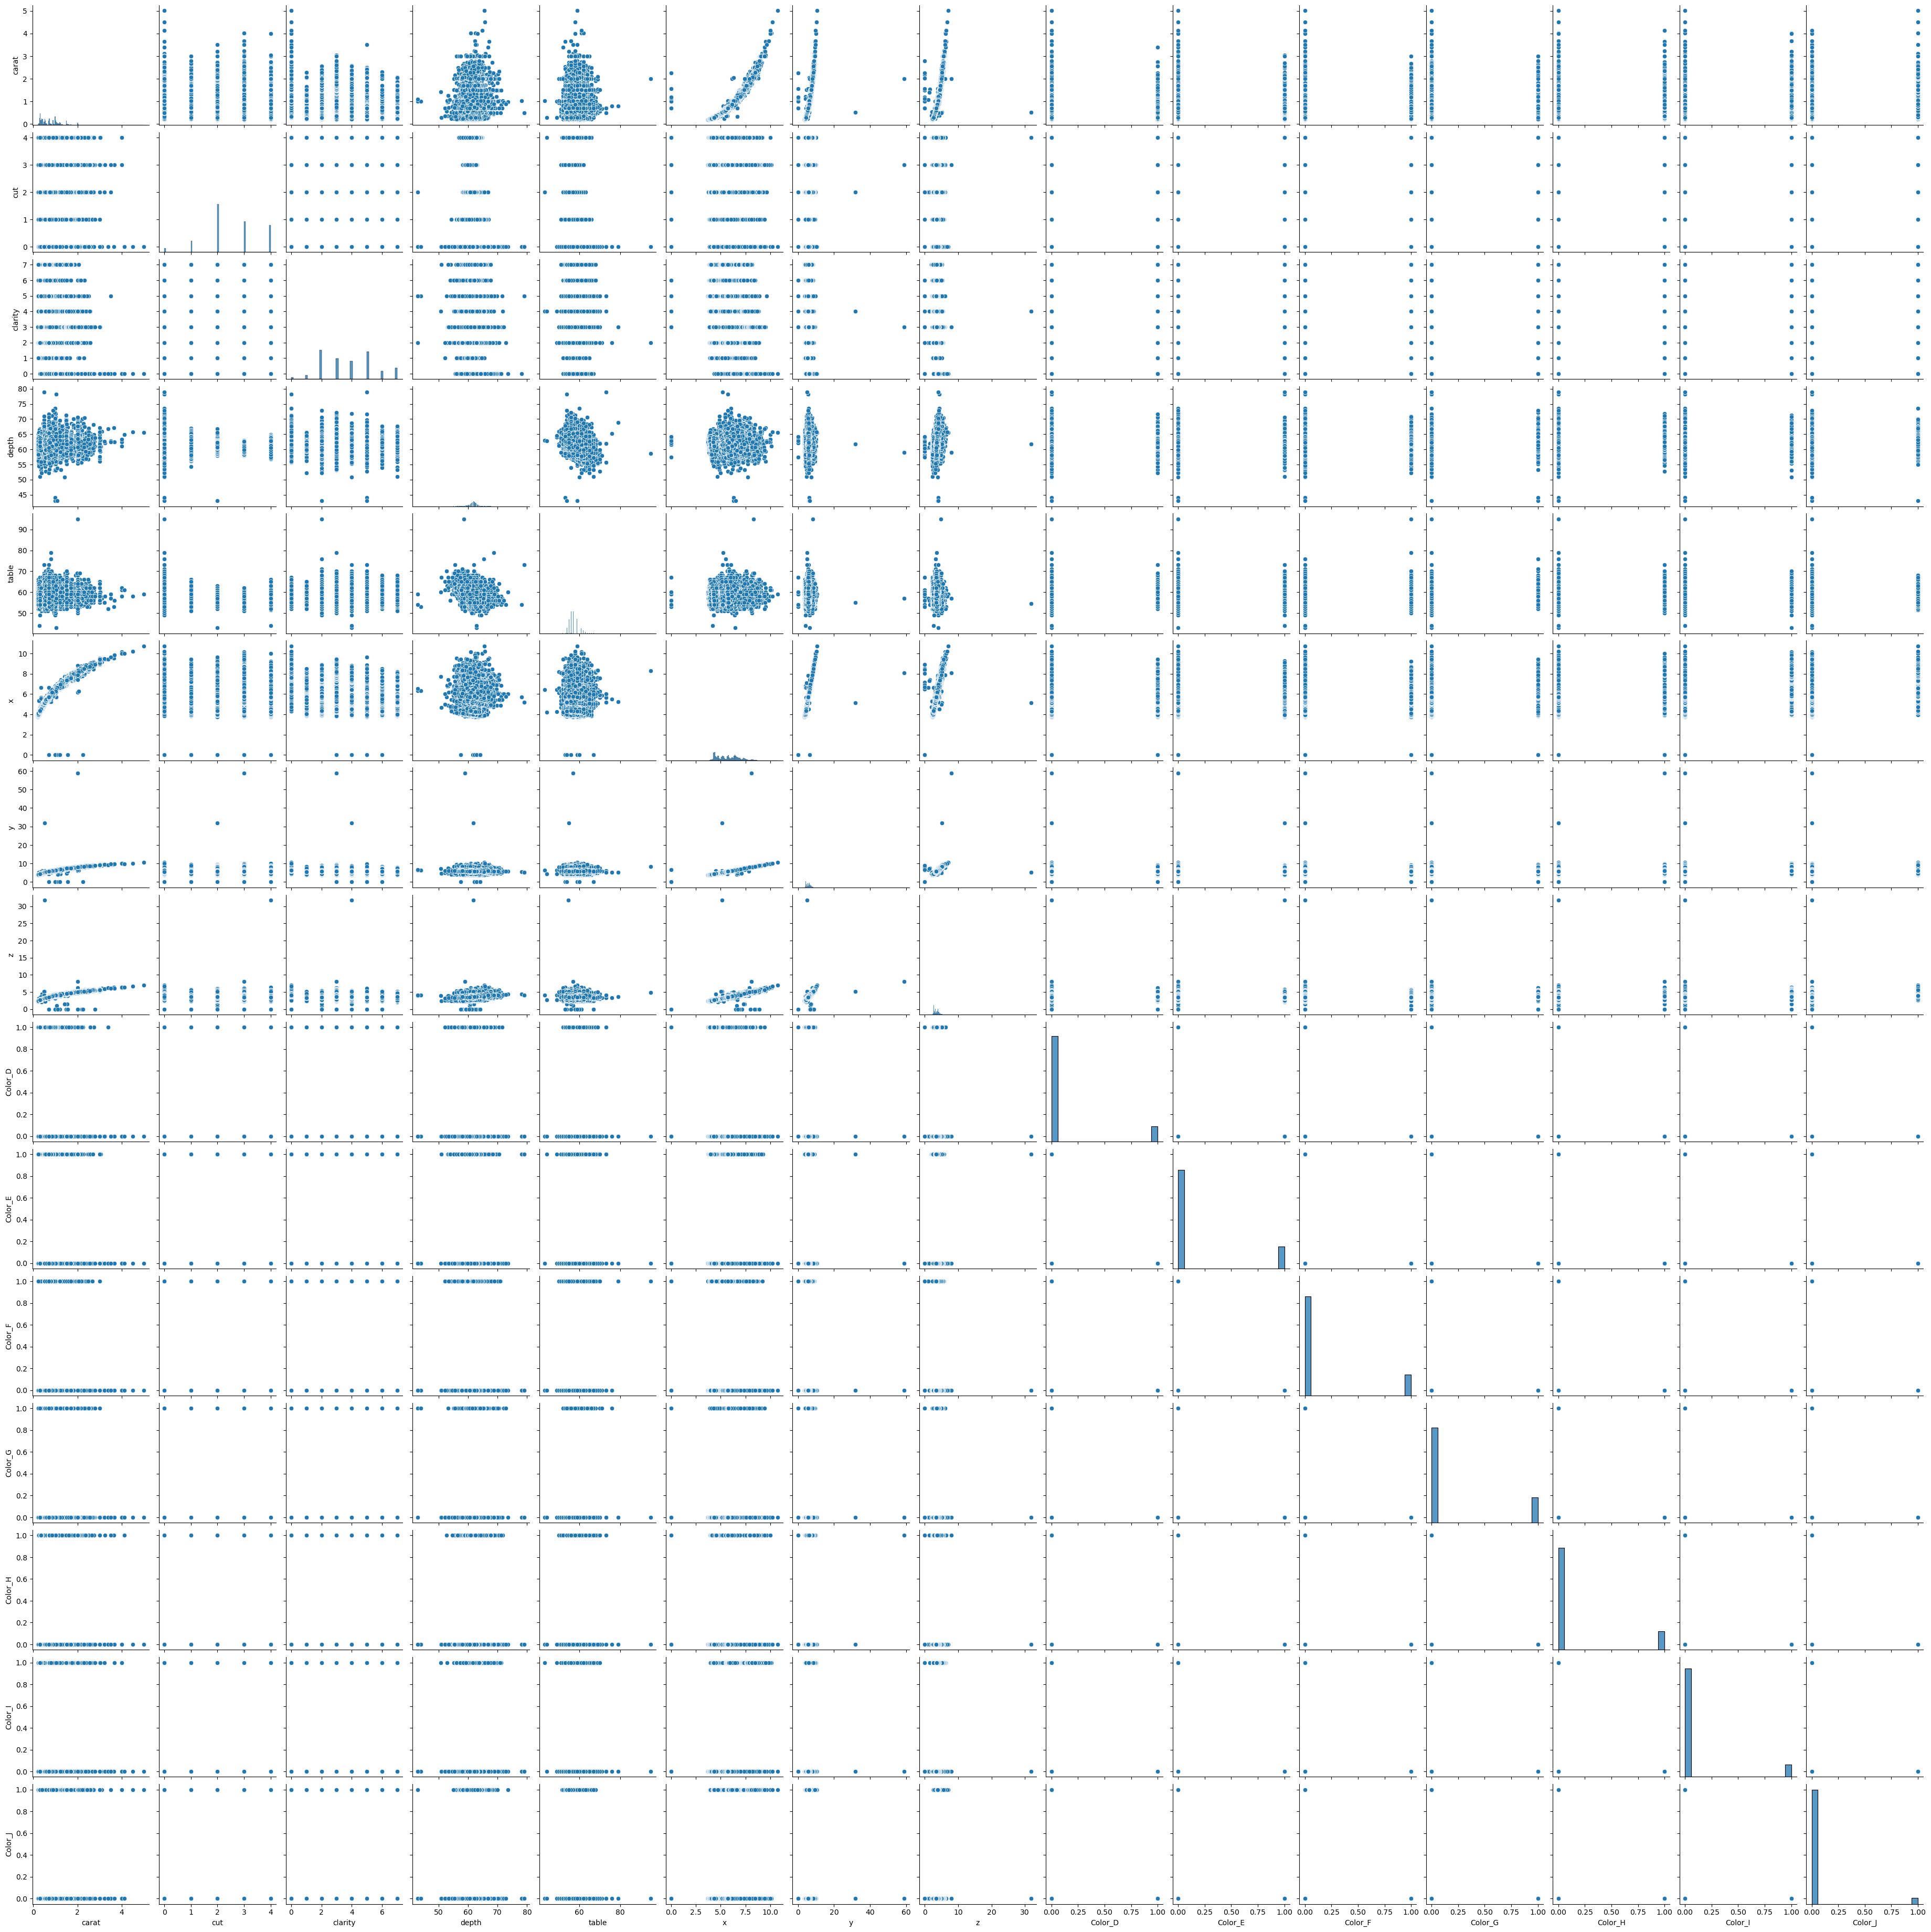

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# pairplot

sns.pairplot(features)
plt.show()